In [1]:
import numpy as np
import matplotlib.pyplot as plt     #importing necessary libraries
import os
import cv2                          #library for computer vision problems

In [2]:
DataDir = r"C:\Users\whatever\Desktop\trainset"    #locating the dataset location
categories = ["invoice","random"]                  #categorising the dataset

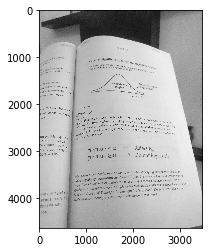

In [3]:
for category in categories:                #iterating single images in categories
    path=os.path.join(DataDir,category)    
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)     #reading the image and converting the image to grayscale(black and white) to reduce the complexity in rgb image
        plt.imshow(img_array,cmap="gray")    
        plt.show()                  #using matplotlib to show the image
        
        break
    
    break

In [4]:
print(img_array)

[[129 138 136 ... 111 100 108]
 [137 138 139 ... 112  99 107]
 [139 137 140 ... 111 109 115]
 ...
 [142 130 139 ...  71  77  73]
 [137 134 146 ...  70  72  72]
 [140 132 141 ...  65  65  69]]


In [5]:
print(img_array.shape)    #shape of image above

(4640, 3480)


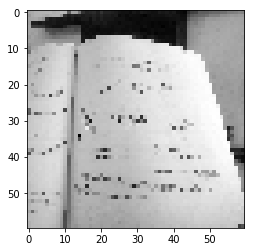

In [6]:
IMG_SIZE = 60    #reducing the image size to 60 to make it easy for computer to analyse

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) #used to resize the image to 60
plt.imshow(new_array, cmap='gray')
plt.show()

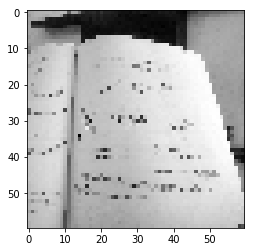

In [7]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

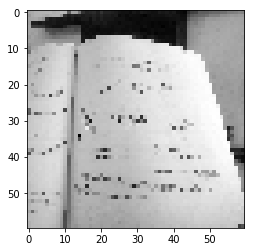

In [8]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [9]:
training_data=[]  #creating training data
def create_training_data():      #defining function as create_training_data
    for category in categories:    #invoice or random
        path=os.path.join(DataDir,category) #joining datadir and category 
        class_num=categories.index(category) #creating index for invoice and random,0-invoice and 1-random
        
        for img in os.listdir(path):   #iterate over each image
            try:
                img_array=cv2.imread(os.path.join(path,img),cv2.IMREAD_GRAYSCALE)
                
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE)) #resize to normalize data
                
                training_data.append([new_array,class_num]) #add to our training data
            except Exception as e:
                pass
            
create_training_data() #calling above function
print(len(training_data))  #length of training data

5803


In [10]:
import random                  #random library to perform random function to training data
random.shuffle(training_data) #shuffling all the data in training data for better results

In [11]:
for sample in training_data[:10]:  #sample 10 data in training data
    print(sample[1])

0
1
1
0
0
0
1
1
0
0


In [12]:
X=[]        #creating to add features since our data is not having any features or labels
y=[]        #creating to add labels

for features, label in training_data:
    X.append(features)
    y.append(label)
print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)  


[[[[150]
   [146]
   [148]
   ...
   [146]
   [145]
   [132]]

  [[154]
   [146]
   [147]
   ...
   [165]
   [162]
   [140]]

  [[155]
   [149]
   [147]
   ...
   [167]
   [165]
   [161]]

  ...

  [[121]
   [128]
   [136]
   ...
   [102]
   [189]
   [122]]

  [[ 85]
   [ 76]
   [ 67]
   ...
   [149]
   [168]
   [117]]

  [[ 80]
   [ 72]
   [ 63]
   ...
   [193]
   [133]
   [ 99]]]]


In [13]:
import pickle                       #pickle is used to save file for further operations
pickle_out = open("X.pickle","wb")  #open(create) pickle file (X.pickle)
pickle.dump(X, pickle_out)          #dumping(saving) created x.pickle file
pickle_out.close()


In [14]:
pickle_out = open("y.pickle","wb")  #similar to x.pickle , y.pickle is created for further using of the file
pickle.dump(y, pickle_out)
pickle_out.close()


In [15]:
from tensorflow.keras.models import Sequential            #importing model sequence from keras
from tensorflow.keras.layers import Dense,Activation,Conv2D,MaxPooling2D,Flatten,Dropout    #importing all the necessary layers in CNN for our operation

In [16]:
import tensorflow as tf       #importing tensorflow


In [17]:
X=pickle.load(open("X.pickle","rb"))  #loading saved x.pickle 
y=pickle.load(open("y.pickle","rb"))  #loading saved y.pickle
X=X/255.0                             #normalizing the data, since highest value of our image is 150, we divide it by 255 so that the resulting number produced will be easy for computer to perform, basically reduces the complexity of our data

In [18]:
model=Sequential()      #we use sequential model

model.add(Conv2D(64, (5, 5),input_shape=X.shape[1:]))  #layer 1 of our CNN ,kernal_size of (5,5) is used because our data or image is larger than 128x128
model.add(Activation('relu'))                        #we use relu activation function in first 3 layers
model.add(MaxPooling2D(pool_size=(2,2)))             #strides of (2,2), meaning 2x2 matrix will be moved at a time

model.add(Conv2D(128,(5,5))) #input_shape=X.shape[1:] is used to eradicate all negative values and consider only positive value(1:) 
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))             #maxpooling is used to reduce the dimensions of output

model.add(Conv2D(256,(5,5)))  #now we send 256 filters, first we send 64 and then 128 filters, it improves the performance of our model
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())                                 #we add flatten layer to flatten our 3D to 1D vectors

model.add(Dense(64))                                 #outputing in 64 layers accounting input from previous results

model.add(Dense(1))
model.add(Activation('sigmoid'))  #at last we use sigmoid activation function because of how efficient it is when compared to other activation function

model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])    #we use adam optimizer and binary_crossentropy as loss function

model.fit(X,y,batch_size=32,epochs=5,validation_split=0.3)   #this is where actuall training of our model starts.Batch_size is the number of samples that we will feed to our model once at a time.
                                                          #epochs is number of entire dataset passed to our model,5 means we pass entire dataset 5 times to our model
                                                  #validation_split is always in fraction meaning fraction of training data to be used in validation data

Instructions for updating:
Colocations handled automatically by placer.
Train on 4062 samples, validate on 1741 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
4062/4062 [==============================] - 501s 123ms/sample - loss: 0.3241 - acc: 0.8612 - val_loss: 0.2146 - val_acc: 0.9098
Epoch 2/5
4062/4062 [==============================] - 488s 120ms/sample - loss: 0.1764 - acc: 0.9318 - val_loss: 0.1558 - val_acc: 0.9328
Epoch 3/5
4062/4062 [==============================] - 481s 118ms/sample - loss: 0.1392 - acc: 0.9473 - val_loss: 0.1223 - val_acc: 0.9535
Epoch 4/5
4062/4062 [==============================] - 479s 118ms/sample - loss: 0.1102 - acc: 0.9552 - val_loss: 0.1098 - val_acc: 0.9546
Epoch 5/5
4062/4062 [==============================] - 489s 120ms/sample - loss: 0.0704 - acc: 0.9719 - val_loss: 0.0839 - val_acc: 0.9690


In [19]:
model.save('128x3-CNN.model') #this is used to save our model so that it can be accessable at any time

In [24]:
def prepare(filepath): #this function is used to load our image in order to check accuracy of our model by converting the image to grayscale(black and white)
    IMG_SIZE = 60  
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE)) 
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [25]:
model = tf.keras.models.load_model("128x3-CNN.model")   #loading the saved model

In [37]:
prediction=model.predict([prepare(r'C:\Users\whatever\Downloads\Invoice Samples\Invoice Samples\imag.png')])#loading any image to check whether it is invoice or any other(random)

print(prediction) #print prediction only in 0 or 1
print(categories[int(prediction[0][0])]) #we use categories in order to give output in string form

[[0.]]
invoice
